In [15]:
from lightkurve import search_targetpixelfile, TessTargetPixelFile
import lightkurve as lk
import numpy as np

In [21]:
search_result = lk.search_targetpixelfile('TIC 213041474')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 05,2018,SPOC,120,213041474,0.0
1,TESS Sector 05,2018,TESS-SPOC,1800,213041474,0.0
2,TESS Sector 32,2020,SPOC,120,213041474,0.0
3,TESS Sector 32,2020,TESS-SPOC,600,213041474,0.0


In [22]:
tpf = search_result[0].download(quality_bitmask="default")

<AxesSubplot:title={'center':'Target ID: 213041474, Cadence: 151577'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

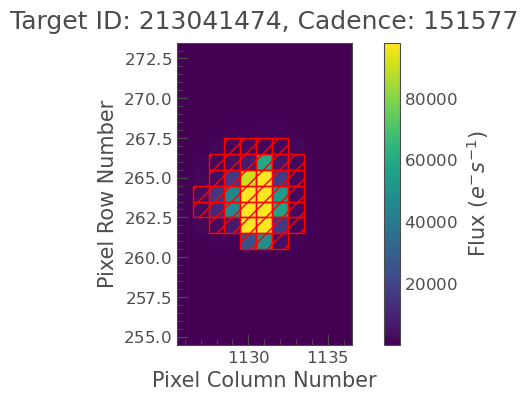

In [23]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

In [10]:
tpf.interact()

In [164]:
tpf.interact_sky()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

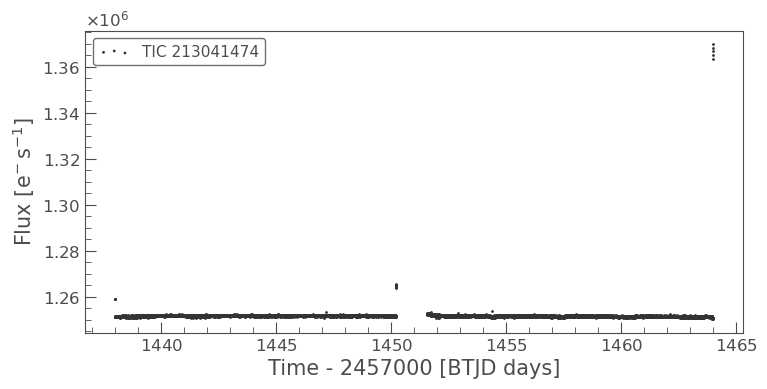

In [24]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve()
lc.scatter()

In [25]:
lc.interact_bls()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

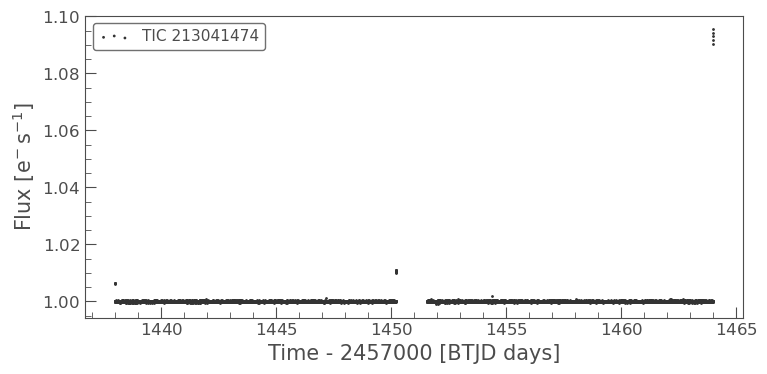

In [26]:
flat_lc = lc.remove_nans().flatten()
flat_lc.scatter()

Period [days]: 0.3375955507193883 d


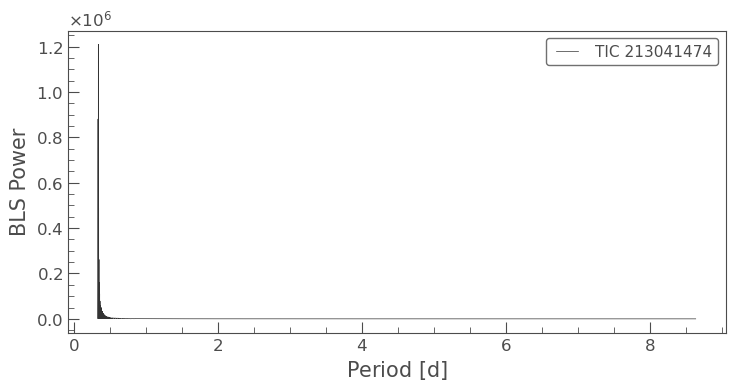

In [27]:
periodogram = flat_lc.to_periodogram(method="bls")
periodogram.plot()
period = periodogram.period_at_max_power
print("Period [days]:",period)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

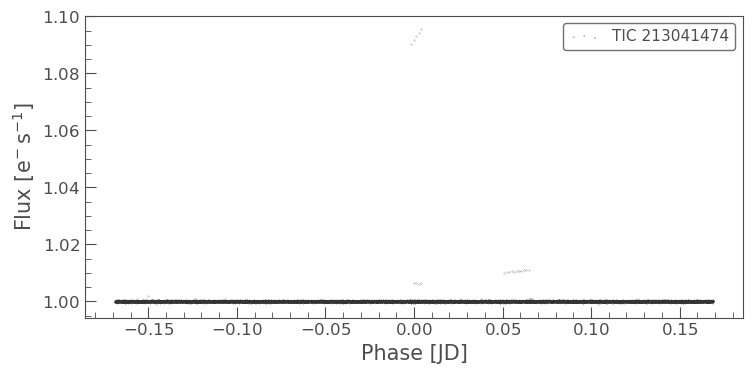

In [28]:
# phase folding the signal frequency
folded_lc = flat_lc.fold(period=period)
folded_lc.scatter(s=0.1)

ERROR:tornado.application:Uncaught exception GET /autoload.js?bokeh-autoload-element=3923&bokeh-absolute-url=http://localhost:55829&resources=none (::1)
HTTPServerRequest(protocol='http', host='localhost:55829', method='GET', uri='/autoload.js?bokeh-autoload-element=3923&bokeh-absolute-url=http://localhost:55829&resources=none', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\tornado\web.py", line 1704, in _execute
    result = await result
  File "C:\Users\hp\anaconda3\lib\site-packages\bokeh\server\views\autoload_js_handler.py", line 62, in get
    session = await self.get_session()
  File "C:\Users\hp\anaconda3\lib\site-packages\bokeh\server\views\session_handler.py", line 144, in get_session
    session = await self.application_context.create_session_if_needed(session_id, self.request, token)
  File "C:\Users\hp\anaconda3\lib\site-packages\bokeh\server\contexts.py", line 243, in create_session_if_needed
    sel

C:\Users\hp\AppData\Local\Temp/ipykernel_2836/3852341979.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  bin_folded_lc = folded_lc.bin(binsize=40)


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

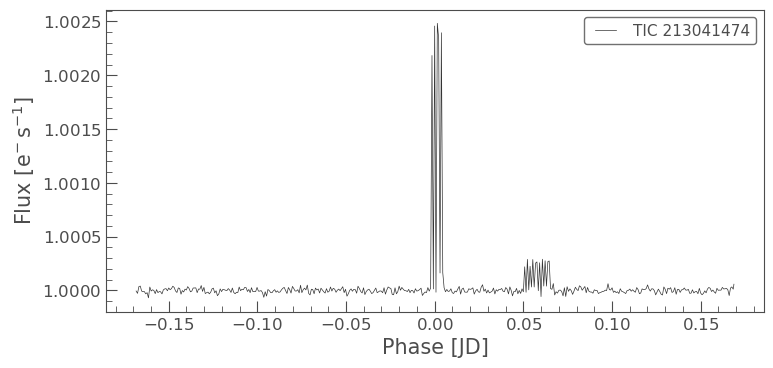

In [29]:
bin_folded_lc = folded_lc.bin(binsize=40)
bin_folded_lc.plot()